# SymPy: Operaciones simbólicas
<img src="https://upload.wikimedia.org/wikipedia/commons/5/54/Sympy_logo.svg" alt="scypy_logo" style="width:300px;height:200px;">

La combinación de SymPy con Jupyter Notebook permite obtener resultados muy vistosos en el cálculo simbólico. Con `sympy` (https://www.sympy.org/en/index.html) es posible escribir expresiones simbolicas y operar con ellas.

In [1]:
import sympy as sp

In [4]:
x, y, z = sp.symbols('x, y, z')
expr = 1 + 2 + x**2 + 3 * x**3
expr

3*x**3 + x**2 + 3

In [3]:
expr.args

(3, x**2, 3*x**3)

### simplify

In [4]:
expr = 2 * (x**2 - x) - x * (x - 1)
expr

2*x**2 - x*(x - 1) - 2*x

In [5]:
sp.simplify(expr)

x*(x - 1)

In [6]:
expr = 2 * sp.sin(x) * sp.cos(x)
expr

2*sin(x)*cos(x)

In [7]:
sp.simplify(expr)

sin(2*x)

In [8]:
expr = sp.exp(x) * sp.exp(y)
expr

exp(x)*exp(y)

In [9]:
sp.simplify(expr)

exp(x + y)

### expand

In [10]:
sp.expand((x + 1) * (x + 2))

x**2 + 3*x + 2

In [11]:
sp.expand(sp.sin(x + y), trig=True)

sin(x)*cos(y) + sin(y)*cos(x)

### factor y collect

In [12]:
sp.factor(x**3 - 1)

(x - 1)*(x**2 + x + 1)

In [13]:
expr = x + y + x * y * z
expr

x*y*z + x + y

In [14]:
sp.collect(expr, x)

x*(y*z + 1) + y

In [15]:
sp.collect(expr, y)

x + y*(x*z + 1)

### Subsituciones

In [16]:
expr = x + y
expr.subs(x, y)

2*y

In [17]:
expr = x + x + z**2 * x
values = {x: 1.25, y:0.4, z:3.2}
expr.subs(values)

15.3000000000000

### Evaluación numérica y lambdify

In [2]:
sp.N(1 + sp.pi)

4.14159265358979

In [5]:
(x + 1/sp.pi).evalf(10)

x + 0.3183098862

In [20]:
expr = sp.sin(sp.pi * x * sp.exp(x))
expr_func = sp.lambdify(x, expr)       # retorna una funcion de la forma expr_func(x): expr_sym
expr_func(1.0)

0.773942685266709

### Cálculo

In [21]:
f = sp.Derivative(x**2, x)
f

Derivative(x**2, x)

In [22]:
f.doit()

2*x

In [23]:
f = sp.Integral(sp.cos(x))
f

Integral(cos(x), x)

In [24]:
f.doit()

sin(x)

In [25]:
f = sp.Integral(sp.exp(-x**2), (x, -sp.oo, sp.oo))
f

Integral(exp(-x**2), (x, -oo, oo))

In [26]:
f.doit()

sqrt(pi)

### Sumatorias y Productos

In [27]:
n = sp.Symbol('n')
S = sp.Sum(1/(n**2), (n, 1, sp.oo))
S

Sum(n**(-2), (n, 1, oo))

In [28]:
S.doit()

pi**2/6

In [29]:
P = sp.Product(n, (n, 1, 5))
P

Product(n, (n, 1, 5))

In [30]:
P.doit()

120

### Solución de ecuaciones

In [31]:
a, b, c = sp.symbols('a, b, c')
expr = a*x**2 + b*x + c
sol = sp.solve(expr, x)
sol[0]

(-b + sqrt(-4*a*c + b**2))/(2*a)

In [32]:
sp.solve(x**2 + 2*x - 3)

[-3, 1]

### Gráficos de ecuaciones simbólicas

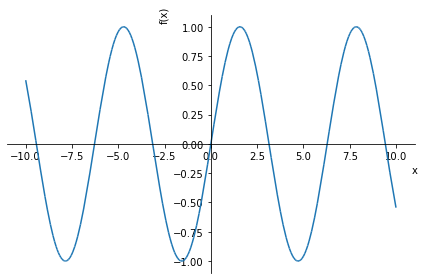

In [33]:
sp.plot(sp.sin(x))

### Ejemplo de aplicación: Cálculo

In [564]:
r, c, h, theta = sp.symbols('r, c, h, theta')

d1 = r * sp.cos(theta)
h = r * sp.sin(theta)

sp.pprint(d1); print()
sp.pprint(h); print()

d2 = sp.sqrt((c**2 - h**2))
sp.pprint(d2); print()

x = d1 + d2
sp.pprint(x); print()

v = sp.Derivative(x, theta).doit()
sp.pprint(v); print()

a = sp.Derivative(x, theta, 2).doit()
sp.pprint(a); print()

r⋅cos(θ)

r⋅sin(θ)

   _________________
  ╱  2    2    2    
╲╱  c  - r ⋅sin (θ) 

              _________________
             ╱  2    2    2    
r⋅cos(θ) + ╲╱  c  - r ⋅sin (θ) 

     2                           
    r ⋅sin(θ)⋅cos(θ)             
- ──────────────────── - r⋅sin(θ)
     _________________           
    ╱  2    2    2               
  ╲╱  c  - r ⋅sin (θ)            

  ⎛    3    2       2                 2                      2                
  ⎜   r ⋅sin (θ)⋅cos (θ)         r⋅sin (θ)              r⋅cos (θ)             
r⋅⎜- ──────────────────── + ──────────────────── - ──────────────────── - cos(
  ⎜                   3/2      _________________      _________________       
  ⎜  ⎛ 2    2    2   ⎞        ╱  2    2    2         ╱  2    2    2           
  ⎝  ⎝c  - r ⋅sin (θ)⎠      ╲╱  c  - r ⋅sin (θ)    ╲╱  c  - r ⋅sin (θ)        

  ⎞
  ⎟
θ)⎟
  ⎟
  ⎟
  ⎠



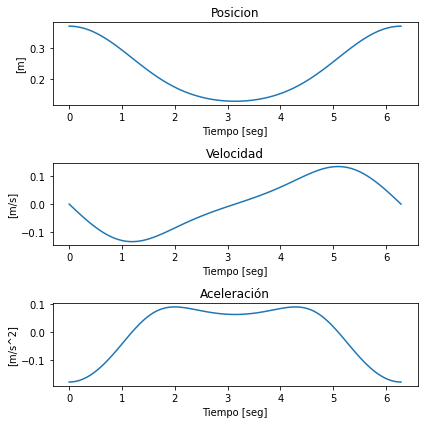

In [604]:
import matplotlib.pyplot as plt

x_func = sp.lambdify((r, c, theta), x)
v_func = sp.lambdify((r, c, theta), v)
a_func =  sp.lambdify((r, c, theta), a)

rev = 500 * 2*np.pi / 60    # rpm a rad/seg
t = np.linspace(0, 2*np.pi / rev, 100)  # Vector de tiempo de una revolucion
ang = rev * t   # Calculo del angulo por cada t

x_array = x_func(0.120, 0.250, ang)
v_array = v_func(0.120, 0.250, ang)
a_array = a_func(0.120, 0.250, ang)

plt.figure(figsize=(6, 6))
plt.subplot(311); plt.plot(ang, x_array); plt.title("Posicion"); plt.xlabel("Tiempo [seg]"); plt.ylabel("[m]")
plt.subplot(312); plt.plot(ang, v_array); plt.title("Velocidad"); plt.xlabel("Tiempo [seg]"); plt.ylabel("[m/s]")
plt.subplot(313); plt.plot(ang, a_array); plt.title("Aceleración"); plt.xlabel("Tiempo [seg]"); plt.ylabel("[m/s^2]")
plt.tight_layout()
plt.show()